First, let's import all require libraries and read the file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve

In [3]:
credit_card_dataset = pd.read_csv("../input/creditcardfraud/creditcard.csv")
credit_card_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
credit_card_dataset['Time'] = ((credit_card_dataset['Time']/3600)%24).sort_values(ascending=False)
credit_card_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000e+00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000e+00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,7.716049e-08,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,7.716049e-08,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.543210e-07,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,6.665586e-03,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,6.665664e-03,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,6.665741e-03,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,6.665741e-03,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7bf05485d710>,
      dtype=object)

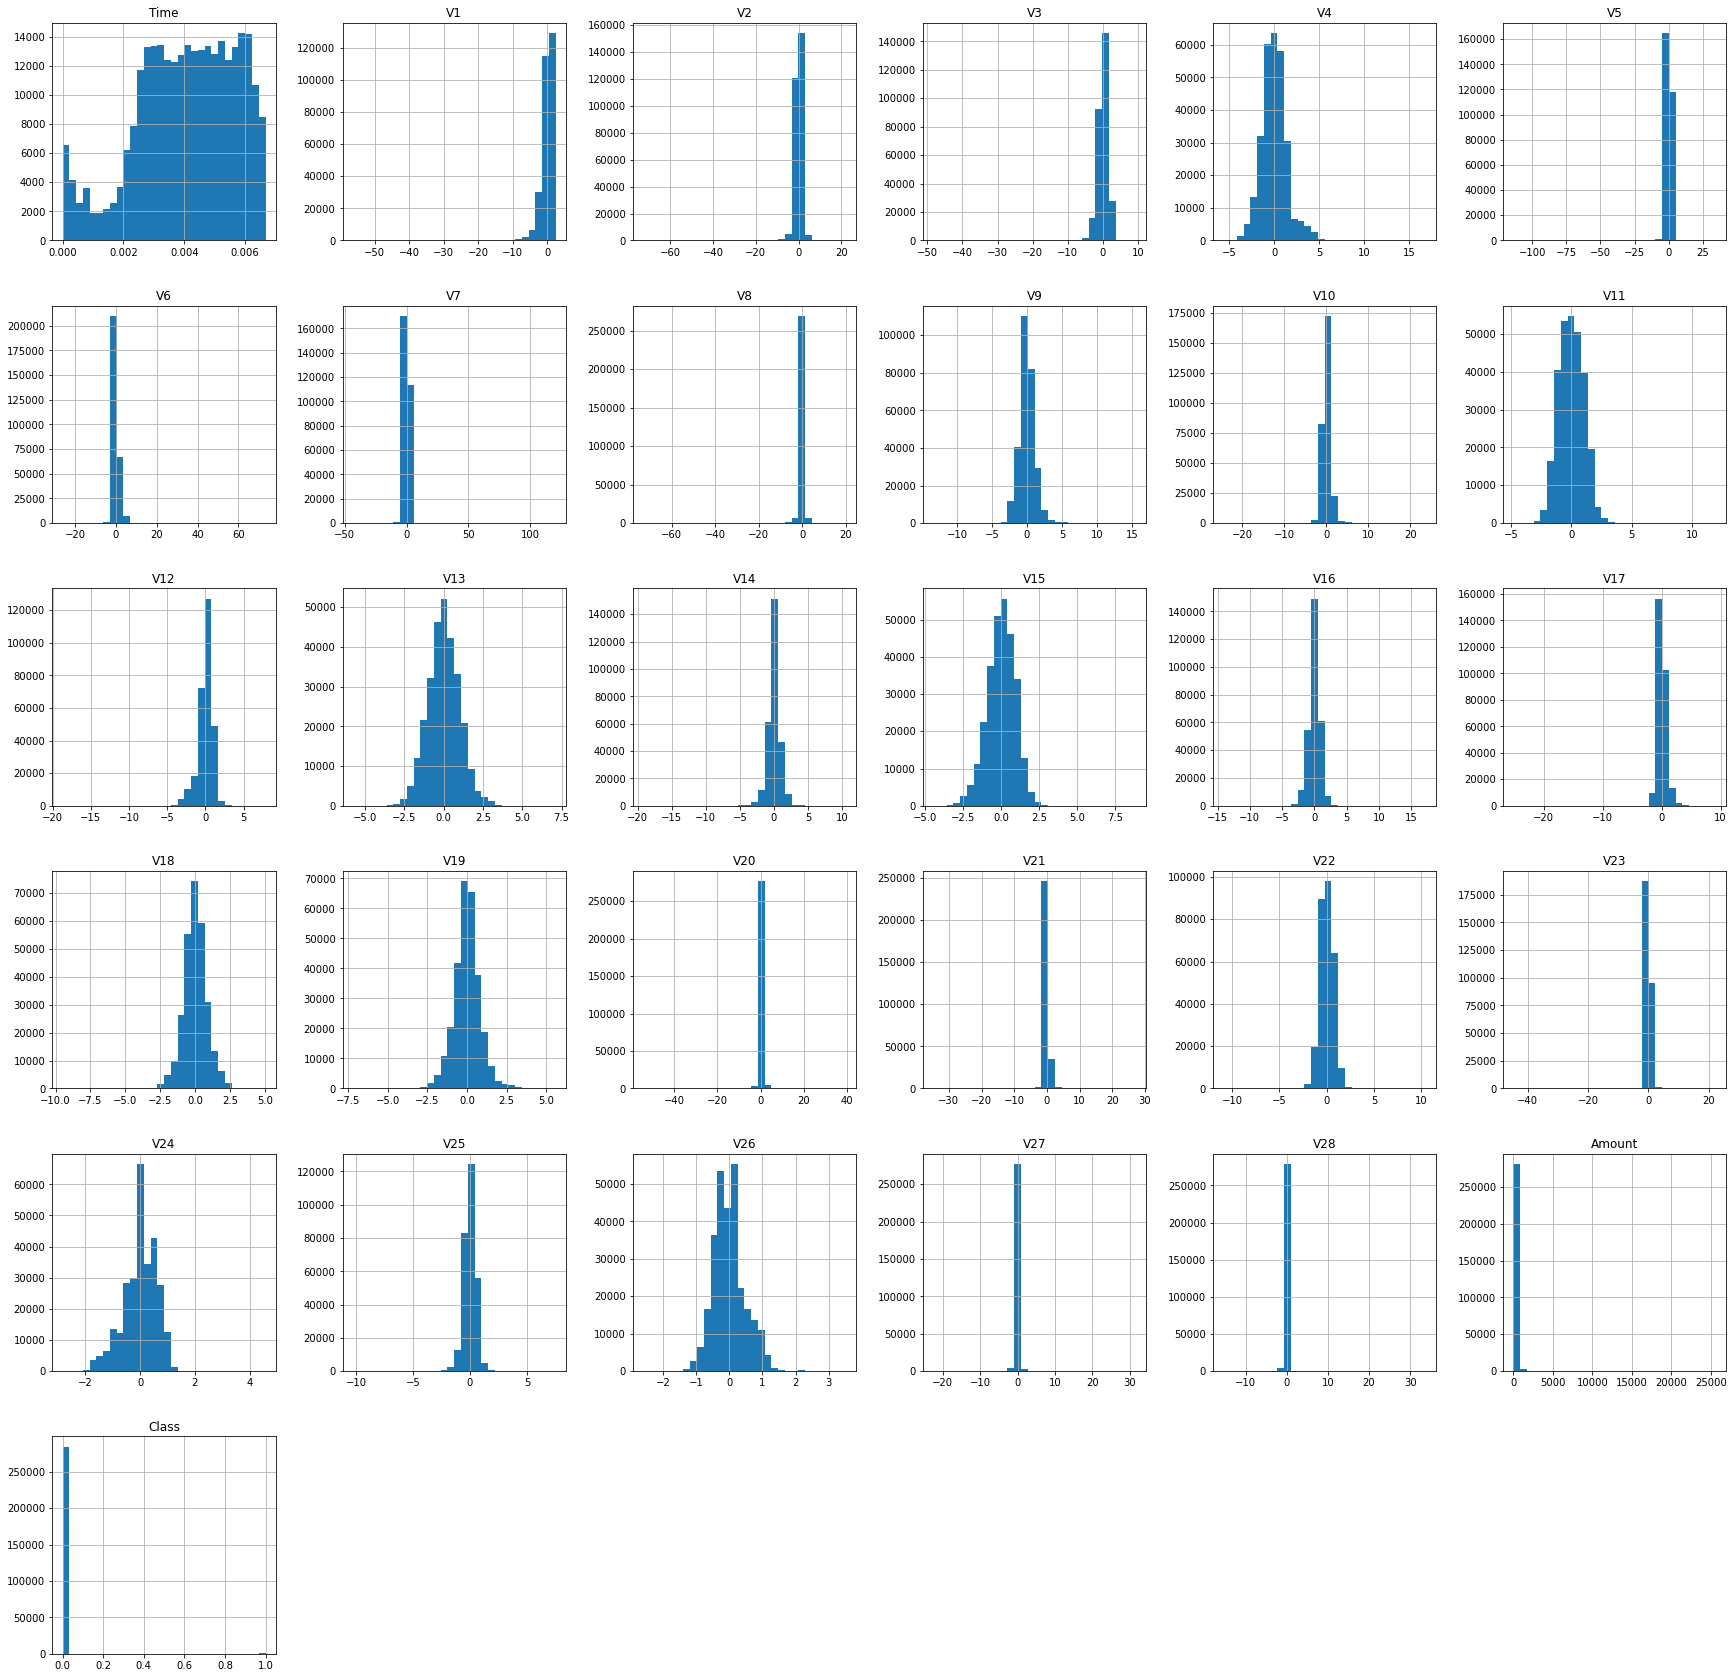

In [29]:
credit_card_dataset.hist(bins=30,figsize=(30,30))

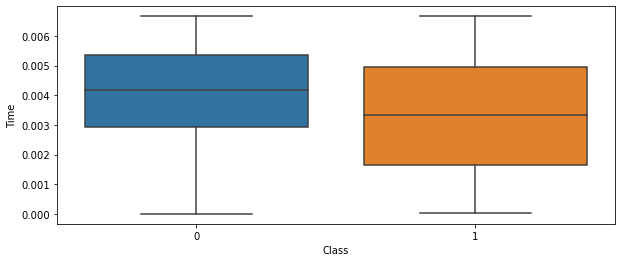

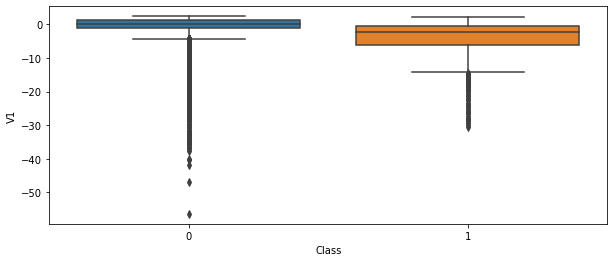

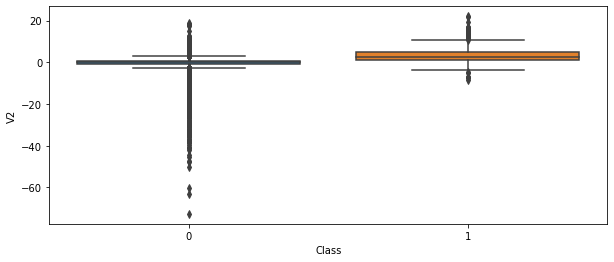

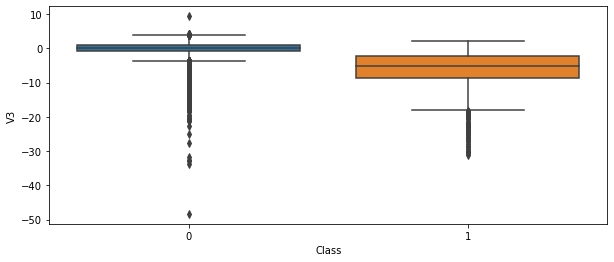

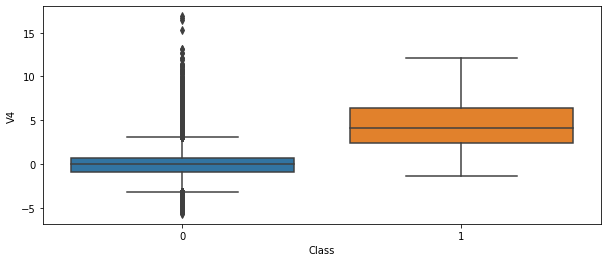

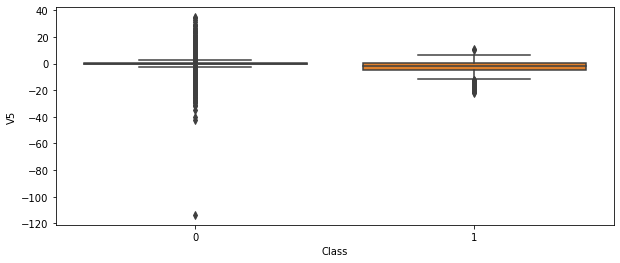

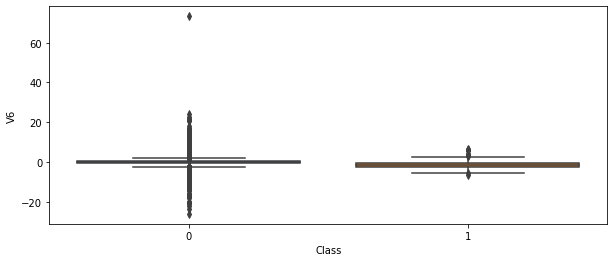

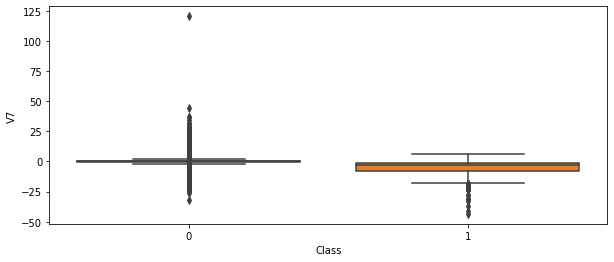

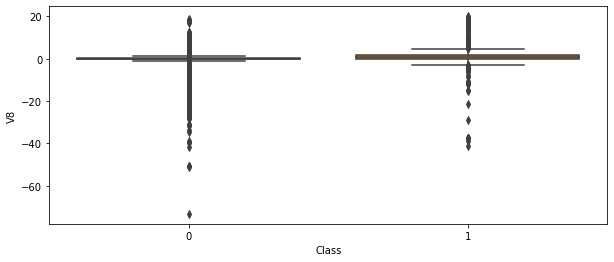

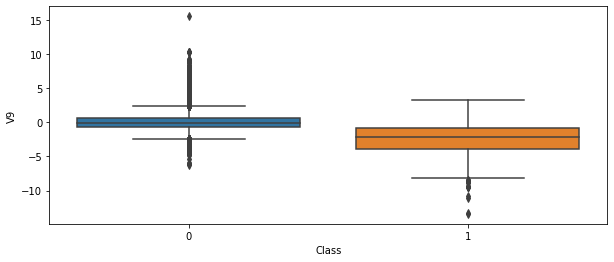

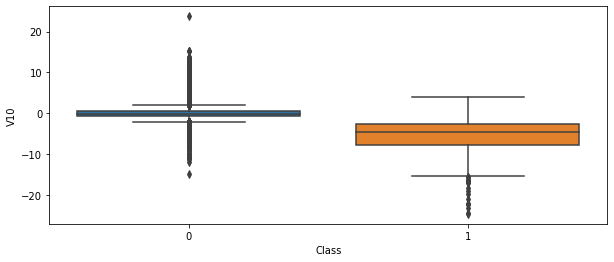

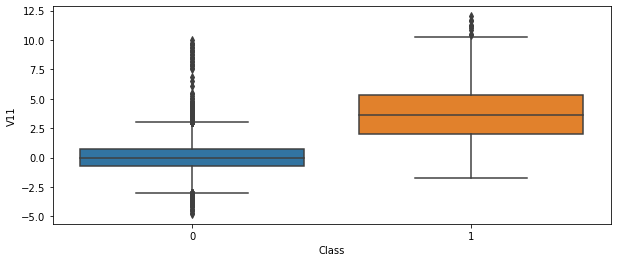

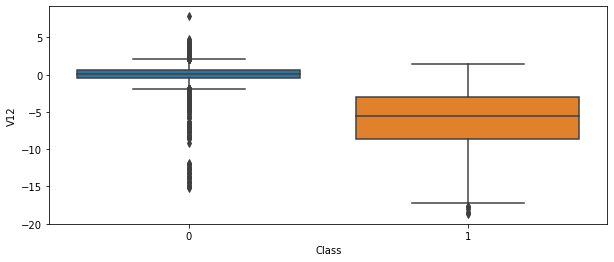

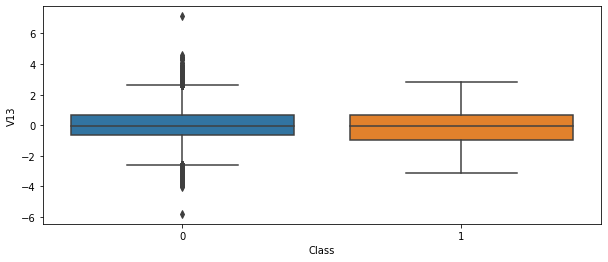

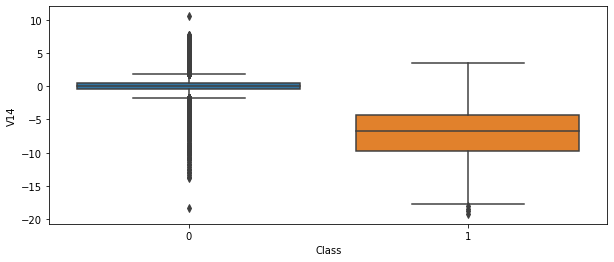

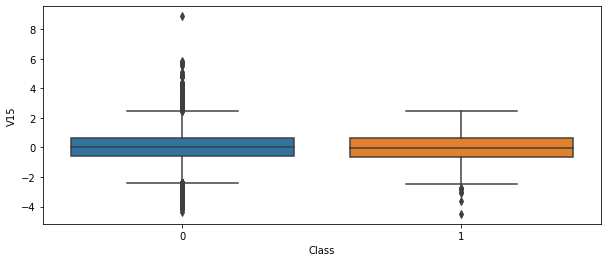

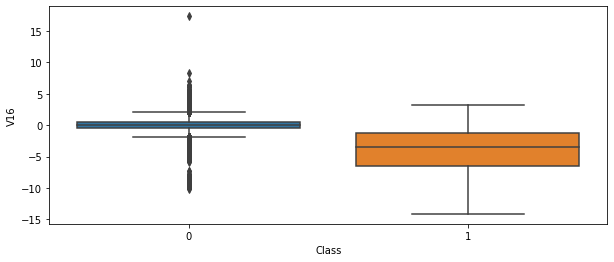

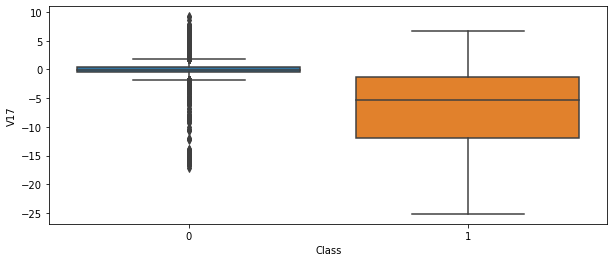

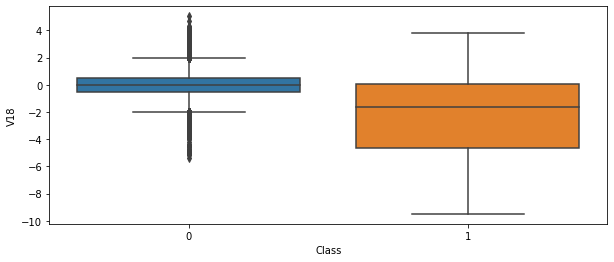

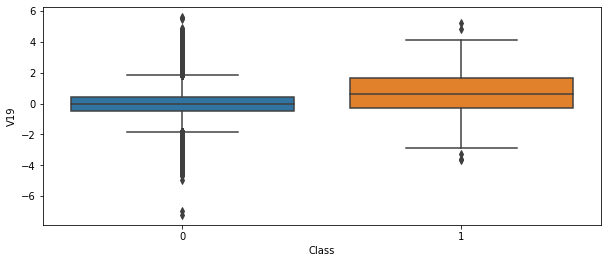

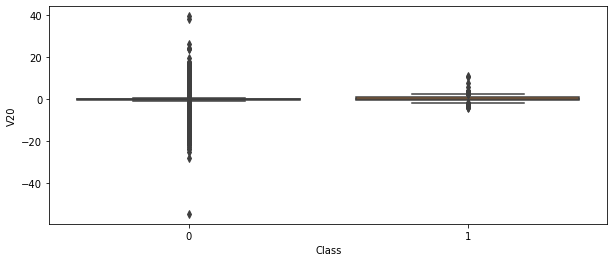

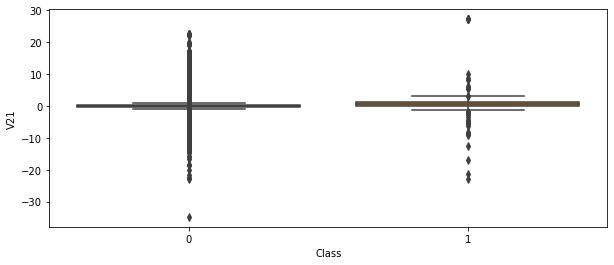

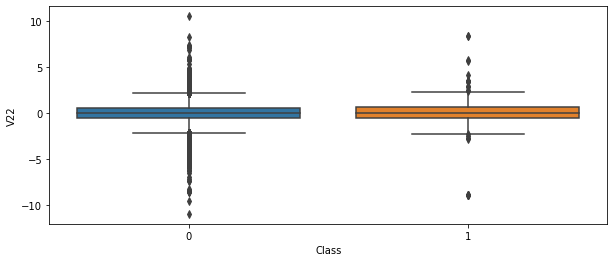

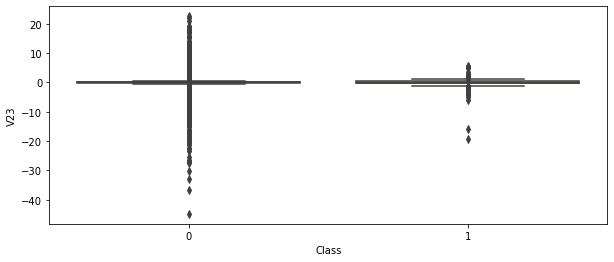

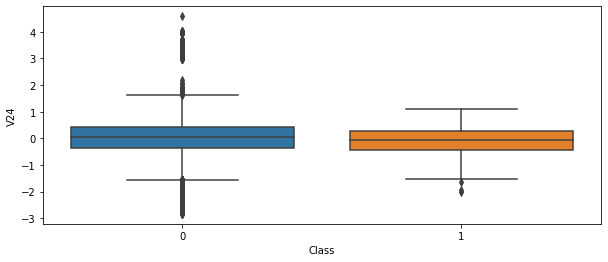

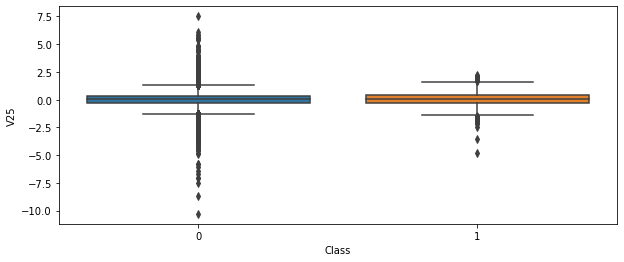

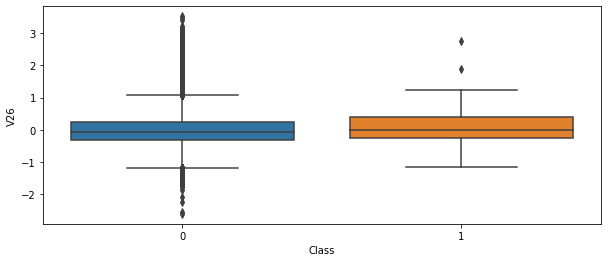

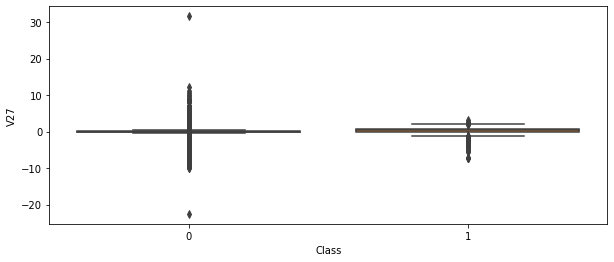

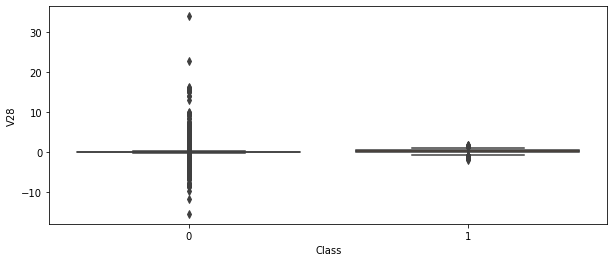

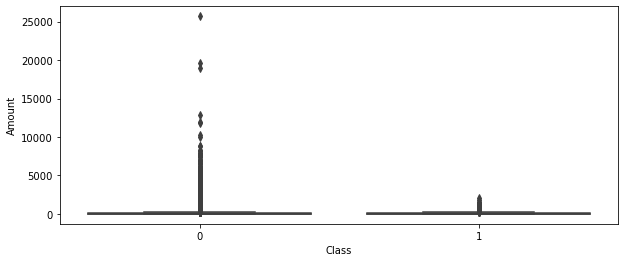

In [31]:
for col in list(credit_card_dataset.columns):
    if col!='Class':
        plt.figure(figsize=(10,4))
        sns.boxplot(data=credit_card_dataset,x='Class',y=col)
        plt.show()

# Model training and validation

Now, let's use **random forest** to train and test model

Since, we are working with imbalanced dataset, we will set stratify=y in train_test_split. It ensures that both training and testing datasets have same ratio of all label classes (0 and 1 in our case) as the complete imput dataset

Moreover, due to class imbalance, we will use F1-score as measure of performance instead of testing accuracy

In [10]:
X = credit_card_dataset.drop(["Class"],axis=1)
y = credit_card_dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1,stratify=y)
forest_model = RandomForestClassifier(n_estimators=20,random_state=1)
forest_model.fit(X_train, y_train)
Y_pred = pd.Series(forest_model.predict(X_test))

print("Training Accuracy :", forest_model.score(X_train, y_train))
print("Testing Accuracy :", forest_model.score(X_test, Y_pred))

conf = confusion_matrix(y_test, Y_pred)
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, Y_pred)*100,2))+" %")
print("\nClassification report\n\n"+str(classification_report(y_test, Y_pred)))

Training Accuracy : 0.999953184616465
Testing Accuracy : 1.0

Confusion matrix
[[71072     7]
 [   18   105]]

F1 score = 89.36 %

Classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.85      0.89       123

    accuracy                           1.00     71202
   macro avg       0.97      0.93      0.95     71202
weighted avg       1.00      1.00      1.00     71202



This is good F1-score.

Now, let's check out **xgboost** performance

In [12]:
from sklearn import datasets
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),random_state=1,base_score=0.3)

In [14]:
X = credit_card_dataset.drop(["Class"],axis=1)
y = credit_card_dataset["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.245,random_state=1,stratify=y)

xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
conf = confusion_matrix(y_test, xgb_y_pred)
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, xgb_y_pred)*100,2))+" %")
print(classification_report(y_test, xgb_y_pred))


Confusion matrix
[[69648     9]
 [   13   108]]

F1 score = 90.76 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69657
           1       0.92      0.89      0.91       121

    accuracy                           1.00     69778
   macro avg       0.96      0.95      0.95     69778
weighted avg       1.00      1.00      1.00     69778



xgboost has better f1 score than random forest. In xgboost, precision may be lower, but recall is much higher than random forest. 

**Recall is more important than precision in case of credit card fraud detection.**

**This is because it is acceptable to an extent that a non-fraud transaction is labelled as fraud (can be resolved by calling up and asking for additional details from the customer/bank).**

**However, it is dangerous to label a fraud as non-fraud (in such scenario, a fraud transaction will go ahead without any checks)**

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [37]:
## Get prediction probabilities (range of 0 to 1) 
xgb_y_pred_prob = xgb_model.predict_proba(X_test)

In [18]:
y_pred_prob_df = pd.DataFrame(xgb_y_pred_prob)[[1]]
print(y_pred_prob_df.sort_values(by=[1],ascending=False).head(118)) # 117 predicted as fraud, and last probability in the list (index = 44160) is for a class predicted as non-fraud

#This verifies the fact that probablity threshold is 0.5. We can look at how recall changes with change in probablity threshold

xgb_y_pred_prob = pd.DataFrame(xgb_y_pred_prob)

              1
34056  1.000000
46586  1.000000
61029  1.000000
12370  1.000000
7096   1.000000
...         ...
51027  0.847517
28967  0.746690
3640   0.618731
37051  0.518748
44160  0.390084

[118 rows x 1 columns]


In [19]:
import sklearn
auprc = sklearn.metrics.average_precision_score(y_test, xgb_y_pred)
print(auprc)

0.8240896744970705


In [20]:
xgb_precision, xgb_recall,threshold = precision_recall_curve(y_test, y_pred_prob_df)
xgb_f1, xgb_auc = f1_score(y_test, xgb_y_pred), auc(xgb_recall, xgb_precision)

In [21]:
print(xgb_f1)
print(xgb_auc)

0.9075630252100841
0.9195211780065001


In [22]:
#threshold = np.append(threshold,[1])
precision_recall_threshold_df = pd.DataFrame([xgb_precision, xgb_recall,threshold]).transpose()
precision_recall_threshold_df.columns = ['Precision','Recall','Threshold']
precision_recall_threshold_df['F1-Score'] = 2*precision_recall_threshold_df['Precision']*precision_recall_threshold_df['Recall']/(precision_recall_threshold_df['Precision']+precision_recall_threshold_df['Recall'])
print(precision_recall_threshold_df)

       Precision    Recall  Threshold  F1-Score
0       0.003300  1.000000   0.000001  0.006578
1       0.003273  0.991736   0.000001  0.006524
2       0.003273  0.991736   0.000001  0.006524
3       0.003273  0.991736   0.000001  0.006524
4       0.003273  0.991736   0.000001  0.006524
...          ...       ...        ...       ...
36044   1.000000  0.066116   1.000000  0.124031
36045   1.000000  0.024793   1.000000  0.048387
36046   1.000000  0.016529   1.000000  0.032520
36047   1.000000  0.008264   1.000000  0.016393
36048   1.000000  0.000000        NaN  0.000000

[36049 rows x 4 columns]


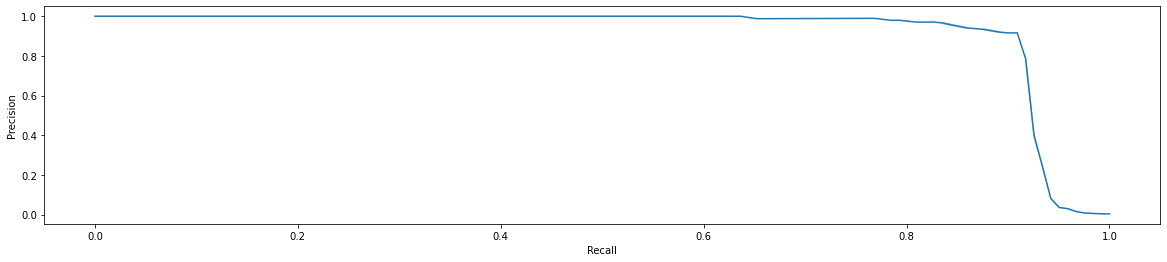

In [23]:
plt.figure(figsize=(20,4))
sns.lineplot(x="Recall", y="Precision", data=precision_recall_threshold_df)
plt.show()

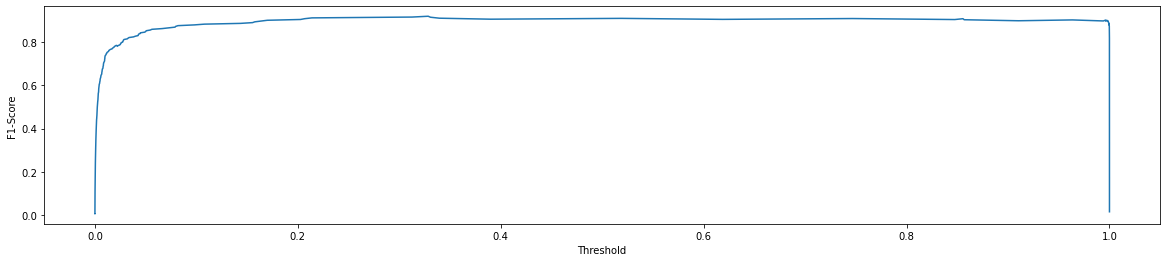

       Precision    Recall  Threshold  F1-Score
35940   0.853846  0.917355   0.143474  0.884462
35941   0.860465  0.917355   0.155411  0.888000
35942   0.867188  0.917355   0.157535  0.891566
35943   0.874016  0.917355   0.163417  0.895161
35944   0.880952  0.917355   0.169909  0.898785
35945   0.888000  0.917355   0.202652  0.902439
35946   0.895161  0.917355   0.206782  0.906122
35947   0.902439  0.917355   0.213961  0.909836
35948   0.909836  0.917355   0.312536  0.913580
35949   0.917355  0.917355   0.328485  0.917355
35950   0.916667  0.909091   0.330730  0.912863
35951   0.915966  0.900826   0.339595  0.908333


In [32]:
plt.figure(figsize=(20,4))
sns.lineplot(x="Threshold", y="F1-Score", data=precision_recall_threshold_df)
plt.show()

print(precision_recall_threshold_df[(precision_recall_threshold_df['Precision']>=0.85) & (precision_recall_threshold_df['Recall']>=0.9)].sort_values(by='Recall',ascending=False))
max_f1_threshold = (precision_recall_threshold_df[precision_recall_threshold_df["F1-Score"]==max(precision_recall_threshold_df["F1-Score"])]["Threshold"]).iloc[0]


In [35]:
## Classify as fraud for probability greater than max_f1_threshold (~0.33)

y_pred_prob_df['class'] = [1 if float(prob)>=max_f1_threshold else 0 for prob in y_pred_prob_df['Prob of 1']]

In [36]:
conf = confusion_matrix(y_test, y_pred_prob_df['class'])
print("\nConfusion matrix\n"+str(conf))
print("\nF1 score = "+str(round(f1_score(y_test, y_pred_prob_df['class'])*100,2))+" %")
print(classification_report(y_test, y_pred_prob_df['class']))


Confusion matrix
[[69647    10]
 [   10   111]]

F1 score = 91.74 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69657
           1       0.92      0.92      0.92       121

    accuracy                           1.00     69778
   macro avg       0.96      0.96      0.96     69778
weighted avg       1.00      1.00      1.00     69778



We observe that using a threshold of 0.33 increases recall from 0.89 to 0.92, which precsion hasn't changed significantly (remains 0.92)

Hence, we will use this threshold for our model